In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

In [15]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from tensorflow.keras.datasets import cifar10
import numpy as np

cifar10_path = 'C:\\Users\\user\\Desktop\\Python\\cifar-10-batches-py'
(train_images, _), (_, _) = cifar10.load_data()
train_images = (train_images - 127.5) / 127.5


170498071/170498071 [==============================] - 44s 0us/step


In [16]:
# Define the generator model
def build_generator(latent_dim):
    model = models.Sequential()
    model.add(layers.Dense(4 * 4 * 256, input_dim=latent_dim))
    model.add(layers.Reshape((4, 4, 256)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Conv2DTranspose(3, kernel_size=4, strides=2, padding="same", activation="tanh"))
    return model

In [17]:
# Define the discriminator model
def build_discriminator(img_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(64, kernel_size=4, strides=2, padding="same", input_shape=img_shape))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Conv2D(128, kernel_size=4, strides=2, padding="same"))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(256, kernel_size=4, strides=2, padding="same"))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation="sigmoid"))
    return model

In [18]:
# Define the DCGAN model
def build_dcgan(generator, discriminator):
    discriminator.trainable = False
    model = models.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

In [19]:
# Define hyperparameters
latent_dim = 100
img_shape = (32, 32, 3)

In [20]:
# Build and compile the discriminator
discriminator = build_discriminator(img_shape)
discriminator.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5), metrics=["accuracy"])

In [21]:
# Build and compile the generator
generator = build_generator(latent_dim)
generator.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5))

In [22]:
# Build and compile the combined DCGAN model
dcgan = build_dcgan(generator, discriminator)
dcgan.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5))

In [23]:
# Function to generate and save images
def generate_fake_images(generator, latent_dim, n_samples=16):
    noise = np.random.normal(0, 1, (n_samples, latent_dim))
    fake_images = generator.predict(noise)
    fake_images = 0.5 * fake_images + 0.5  # Rescale pixel values to the range [0, 1]
    return fake_images

In [30]:
# Training the DCGAN
epochs = 100
batch_size = 50


2/2 [==============================] - 0s 52ms/step
Epoch 0/100, D Loss: 0.00014158924386720173, G Loss: 0.0006538290763273835
1/1 [==============================] - 0s 65ms/step


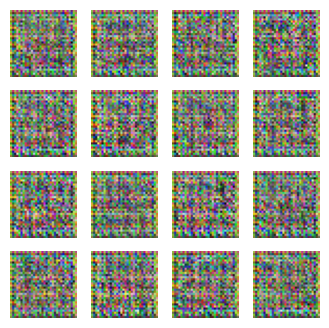

2/2 [==============================] - 0s 49ms/step


In [31]:
for epoch in range(epochs):
    idx = np.random.randint(0, train_images.shape[0], batch_size)
    real_images = train_images[idx]

    # Generate fake images
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_images = generator.predict(noise)

    # Label real and fake images
    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))

    # Train the discriminator on real and fake images separately
    d_loss_real = discriminator.train_on_batch(real_images, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train the generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    valid_labels = np.ones((batch_size, 1))
    g_loss = dcgan.train_on_batch(noise, valid_labels)

    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs}, D Loss: {d_loss[0]}, G Loss: {g_loss}")

    # Save generated images at specified intervals
    if epoch % 1000 == 0:
        fake_images = generate_fake_images(generator, latent_dim)
        plt.figure(figsize=(4, 4))
        for i in range(fake_images.shape[0]):
            plt.subplot(4, 4, i + 1)
            plt.imshow(fake_images[i])
            plt.axis("off")
        plt.show()


# 2.Explore the Latent Space when Generating images

In [43]:
import os
print(os.getcwd())

C:\Users\user\Desktop\Python


In [44]:
import os
files_in_directory = os.listdir(os.getcwd())
print(files_in_directory)


['.ipynb_checkpoints', 'agent.py', 'auto_insurance_payment.csv', 'bankloans.csv', 'behavioural_cloning.py', 'cars_test.csv', 'cars_test.xlsx', 'cars_train.csv', 'cars_train.csv.xlsx', 'cars_train.xlsx', 'cifar-10-batches-py', 'Customers.csv', 'data_loader.py', 'Day 7.ipynb', 'Day 8.ipynb', 'diabetes_na.csv', 'Durai Day 1.ipynb', 'Durai Day 17-11-2023.ipynb', 'Durai Day 9.ipynb', 'Durai DAY2.ipynb', 'Durai DAY3.ipynb', 'Durai DAY4.ipynb', 'Durai DAY5.ipynb', 'Durai DAY6.ipynb', 'Durai DAY7.ipynb', 'Durai Day8.ipynb', 'employees2.csv', 'fraud-detection.csv', 'generator_model.h5.txt', 'house.csv', 'household_power_consumption_days.csv', 'HR_comma_sep.xlsx', 'international-airline-passengers.csv', 'inverse_dynamics_model.py', 'Leaf1.jpg', 'leaf2.jpg', 'Mall_Customers.csv', 'predictive_maintenance_model.h5', 'Price Prediction_Case Study_saturday_Assignments.pdf', 'prices.csv', 'requirements.txt', 'run_agent.py', 'run_inverse_dynamics_model.py', 'shopping_trends.csv', 'test.csv', 'train.csv'

In [50]:
import os

file_path = 'C:/Users/user/Desktop/Python/generator_model.h5'

if os.path.exists(file_path):
    generator = load_model(file_path)
else:
    print(f"The file {file_path} does not exist.")


The file C:/Users/user/Desktop/Python/generator_model.h5 does not exist.


In [56]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the trained generator model
generator = load_model('C:\\Users\\user\\Desktop\\Python\\generator_model.h5')

# Define the latent space dimension (length of the input vector to the generator)
latent_dim = 100

# Function to generate images by sampling the latent space
def generate_images(generator, latent_dim, num_samples=16):
    # Generate random latent vectors
    latent_vectors = np.random.normal(size=(num_samples, latent_dim))
    
    # Generate images using the generator
    generated_images = generator.predict(latent_vectors)

    # Rescale images to 0-1 for display
    generated_images = 0.5 * generated_images + 0.5

    return generated_images

# Generate and plot images
generated_images = generate_images(generator, latent_dim)
plt.figure(figsize=(10, 10))

for i in range(generated_images.shape[0]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(generated_images[i])
    plt.axis('off')

plt.show()


OSError: No file or directory found at C:\Users\user\Desktop\Python\generator_model.h5

In [57]:
generator = load_model('C:\\Users\\user\\Desktop\\Python\\generator_model.h5')


OSError: No file or directory found at C:\Users\user\Desktop\Python\generator_model.h5